# Projet 6 - Feature text

# Import des librairies et des données

In [2]:
!pip install pandas matplotlib numpy seaborn scikit-learn missingno plotly nltk gensim transformers torch tensorflow_hub
!pip freeze > requirements.txt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import missingno as msno
import plotly.express as px
import random
#import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow_hub as hub

from gensim.models import Word2Vec

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.cm as cm

from transformers import AutoTokenizer, AutoModel
import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


# Vérifier les versions des packages
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)

/Users/j/Documents/OC_Inge_IA/Projet_6/.venv/lib/python3.11/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
/Users/j/Documents/OC_Inge_IA/Projet_6/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pandas version: 2.3.3
NumPy version: 2.0.2
Seaborn version: 0.13.2


In [4]:
# Téléchargements nécessaires (à exécuter une seule fois)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /Users/j/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/j/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/j/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/j/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/j/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/j/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
data = pd.read_csv('data/Flipkart/flipkart_com-ecommerce_sample_1050.csv')
df = data.copy()
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
893,526cb1e7675adb39a1ea68f1f2a3fd59,2015-12-20 08:26:17 +0000,http://www.flipkart.com/durga-home-trendz-cott...,Durga Home Trendz Cotton Hand Towel,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWEDGMRHGQZKRZR,599.0,250.0,526cb1e7675adb39a1ea68f1f2a3fd59.jpg,False,Durga Home Trendz Cotton Hand Towel (Hand Towe...,No rating available,No rating available,Durga Home Trendz,"{""product_specification""=>[{""key""=>""Machine Wa..."
195,2e3586dc60df258c5478446d65a317d2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/s-c-handicrafts-sandal...,S C Handicrafts Sandalwood Carved Chinese Quee...,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIE3FHYRRQGFFXN,11900.0,8900.0,2e3586dc60df258c5478446d65a317d2.jpg,False,Buy S C Handicrafts Sandalwood Carved Chinese ...,No rating available,No rating available,S C Handicrafts,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
281,db3e2eeb4fe90d4755f2911d661eae95,2016-04-24 18:34:50 +0000,http://www.flipkart.com/bhavya-velvet-sofa-cov...,Bhavya Velvet Sofa Cover,"[""Home Furnishing >> Living >> Sofa Covers >> ...",SLIEHET3CZ6XSDHP,3000.0,1999.0,db3e2eeb4fe90d4755f2911d661eae95.jpg,False,Bhavya Velvet Sofa Cover (Grey Pack of 10) Pri...,No rating available,No rating available,Bhavya,"{""product_specification""=>[{""key""=>""Pack of"", ..."
475,1c0fdd598671f6f4e10b21435d766cf3,2016-04-16 13:01:18 +0000,http://www.flipkart.com/allin-exporters-cumin-...,Allin Exporters Cumin Seed Oil (Co2 Extract),"[""Beauty and Personal Care >> Bath and Spa >> ...",BEOEGXRWE4NDBJNV,3899.0,3899.0,1c0fdd598671f6f4e10b21435d766cf3.jpg,False,Key Features of Allin Exporters Cumin Seed Oil...,No rating available,No rating available,Allin Exporters,"{""product_specification""=>[{""value""=>""Essentia..."
439,26269fd0df12630eec4508c2cf3c94e1,2016-04-19 09:52:52 +0000,http://www.flipkart.com/jewelkraft-designs-bro...,"JewelKraft Designs Brown, Pink Table Linen Set","[""Home Furnishing >> Kitchen & Dining Linen >>...",TLSEHUFCGASFZ2GG,800.0,649.0,26269fd0df12630eec4508c2cf3c94e1.jpg,False,"Specifications of JewelKraft Designs Brown, Pi...",No rating available,No rating available,JewelKraft Designs,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


On va garder principalement la description et le product_category_tree

# Analyse exploratoire

In [6]:
# Shape du dataframe
print("La shape du DataFrame est :")
print(df.shape)
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("\n" + "-"*50 + "\n")

# Informations générales sur le DataFrame
print("Informations générales sur le DataFrame :")
print(df.info())

La shape du DataFrame est :
(1050, 15)
Nombre de lignes : 1050
Nombre de colonnes : 15

--------------------------------------------------

Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  prod

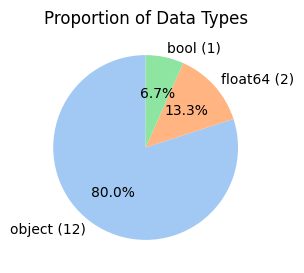

object     12
float64     2
bool        1
Name: count, dtype: int64


In [7]:
# Pie Chart of Data Types
plt.figure(figsize=(3, 3))
df.dtypes.value_counts().plot(kind='pie', labels = [f"{dtype} ({count})" for dtype, count in zip (df.dtypes.value_counts().index, df.dtypes.value_counts().values) ],
                                                    autopct='%1.1f%%', 
                                                    startangle=90, 
                                                    colors=sns.color_palette("pastel"))
#value counts permet de compter le type de variable contenu dans chaque colonne
plt.title("Proportion of Data Types")
plt.ylabel("")  # On cache le label de y-axis
plt.show()
print(df.dtypes.value_counts())

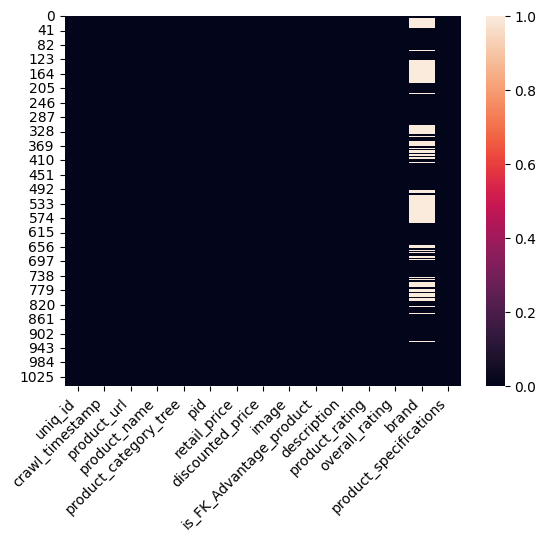

In [8]:
#Visualisation des valeurs manquantes sous forme de heatmap

sns.heatmap(df.isna())
plt.xticks(rotation=45, ha='right'); #Ajouter ; me permet de ne pas avoir les infos de type (array([...]), [...]) devant mon graphe
plt.show()

In [9]:
#Affichage du pourcentage de valeurs manquantes sous forme textuelle

list_variable = ['brand']
for name_variable in list_variable:
    print(f"Le pourcentage de valeurs manquantes de {name_variable} est {df[name_variable].isna().sum()/df.shape[0]*100:.2f} %")

Le pourcentage de valeurs manquantes de brand est 32.19 %


# Prétraitement des données

- Nettoyage textes (lowercase, suppression ponctuation, tokenisation, stop-words, lemmatisation/stemming si pertinent).
- Vérification corrélations champ manquant / duplicatas / images corrompues.
- Standardisation images (resize, normalisation pixel, vérification ratio / orientation).

On traitera les images dans un deuxième temps

## Nettoyage du texte avec une regex

In [10]:
df.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
423,00e966a5049a262cfc72e6bbf68b80e7,2016-06-17 07:53:02 +0000,http://www.flipkart.com/ygs-keyboard-case-asus...,YGS Keyboard Case for Asus Memo Pad 7in Tab,"[""Computers >> Tablet Accessories >> Cases & C...",ACCEJGH6JVTM4CBH,1000.0,499.0,00e966a5049a262cfc72e6bbf68b80e7.jpg,False,Key Features of YGS Keyboard Case for Asus Mem...,No rating available,No rating available,YGS,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
705,595f508cdfbfa162d0fe7b97cc99ef42,2016-01-01 19:37:22 +0000,http://www.flipkart.com/rajasthanikart-floral-...,RajasthaniKart Floral Double Quilts & Comforte...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEDQ27FMZMQCDS,2899.0,1499.0,595f508cdfbfa162d0fe7b97cc99ef42.jpg,False,Buy RajasthaniKart Floral Double Quilts & Comf...,No rating available,No rating available,RajasthaniKart,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
898,4b03cdfc7d1135c972e5c620dd7da66c,2016-06-17 12:24:49 +0000,http://www.flipkart.com/kds-surgical-tripod-wa...,KDS SURGICAL Tripod Walking Stick,"[""Beauty and Personal Care >> Health Care >> H...",WSIEJFMZZGNNEHPG,999.0,429.0,4b03cdfc7d1135c972e5c620dd7da66c.jpg,False,Specifications of KDS SURGICAL Tripod Walking ...,No rating available,No rating available,KDS SURGICAL,"{""product_specification""=>nil}"


In [11]:
pd.set_option('display.max_colwidth', None)   # Do not truncate column text
pd.set_option('display.width', None)          # Let output use full notebook width

print(df['product_category_tree'].sample(10))

pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')


892                                                         ["Home Furnishing >> Bath Linen >> Towels"]
253       ["Kitchen & Dining >> Cookware >> Pots & Pans >> Woks & Kadhais >> Metallino Woks & Kadhais"]
181                                        ["Kitchen & Dining >> Coffee Mugs >> Printland Coffee Mugs"]
992    ["Kitchen & Dining >> Bar & Glassware >> Bar Accessories >> Cork Screws >> Pedrini Cork Screws"]
544                                             ["Watches >> Wrist Watches >> Only Kidz Wrist Watches"]
165                                       ["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]
884                                                         ["Home Furnishing >> Bath Linen >> Towels"]
157                                         ["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]
339                                    ["Computers >> Network Components >> Routers >> Edimax Routers"]
605                                                             

On crée une colonne catégorie, qui correspondra à la colonne product_category_tree nettoyée, dans laquelle on a gardé seulement le premier mot clé.

In [12]:
df['categorie'] = df['product_category_tree'].str.replace(r'^\s*\[\s*"', '', regex=True).str.split('>>').str[0].str.strip()
df.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie
614,4589c5021b21525b4779260f7e86f355,2016-06-21 02:47:15 +0000,http://www.flipkart.com/innovative-single-corn...,Innovative Single Corner Stainless Steel Wall ...,"[""Home Decor & Festive Needs >> Wall Decor & C...",RSFEJT4ZNP5V7HH2,850.0,599.0,4589c5021b21525b4779260f7e86f355.jpg,False,Key Features of Innovative Single Corner Stain...,No rating available,No rating available,Innovative,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Decor & Festive Needs
701,14bc693d9b86c58696e5917045e9d4de,2016-01-01 19:37:22 +0000,http://www.flipkart.com/sapatos-plain-single-d...,Sapatos Plain Single Duvet White,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEEDGBQZFXHG5W,2999.0,1499.0,14bc693d9b86c58696e5917045e9d4de.jpg,False,Buy Sapatos Plain Single Duvet White at Rs. 14...,No rating available,No rating available,Sapatos,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
345,d43d9bb261aaaf818c81a645e727b2d3,2015-12-01 06:13:00 +0000,http://www.flipkart.com/trendnet-tha-101-n300-...,TRENDnet THA-101 N300 Router,"[""Computers >> Network Components >> Routers >...",RTRE3YZGGMGJ42BF,8499.0,4989.0,d43d9bb261aaaf818c81a645e727b2d3.jpg,False,Buy TRENDnet THA-101 N300 Router only for Rs. ...,No rating available,No rating available,TRENDnet,"{""product_specification""=>[{""key""=>""Wireless S...",Computers


On va commencer par faire le lemming, stemming, et tokenizing

## Nettoyage du texte avec Stemming, Lemming et Tokenisation

Tokenising : découper la phrase en mots (tokens). On transforme la phrase en liste de mots.

Stemming : couper les mots pour garder la racine brute (ex. manger → mang), simple et rapide, parfois violent.

Lemmatisation : ramener au lemme réel (ex. mangé → manger), plus sémantique mais nécessite un modèle linguistique.

Key differences:

Stemming: Fast but crude - just chops off endings ("running" → "run", "beautiful" → "beauti")
Lemmatization: Slower but accurate - uses vocabulary and morphology ("running" → "run", "beautiful" → "beautiful")

In practice: You'd choose stemming for speed (search engines) or lemmatization for accuracy (sentiment analysis, classification). The typical pipeline is: tokenize → remove stopwords → stem/lemmatize → further processing.

In [13]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopword_set = set(stopwords.words('english'))

def process_text_en(text):

    tokens = word_tokenize(text.lower())
    processed_tokens = []

    for tok in tokens:
        # 4) Lemmatization
        lemma = lemmatizer.lemmatize(tok)
        processed_tokens.append(lemma)
        
    return processed_tokens

# Application sur la colonne
df['description_cleaned'] = df['description'].apply(process_text_en)
df.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie,description_cleaned
554,b144a363c107c7bdd91f32d6e28ba6f2,2016-01-07 05:50:25 +0000,http://www.flipkart.com/timewel-1100-n1192-ana...,Timewel 1100-N1192 Analog Watch - For Men,"[""Watches >> Wrist Watches >> Timewel Wrist Wa...",WATEYAP38HHARJDT,995.0,995.0,b144a363c107c7bdd91f32d6e28ba6f2.jpg,False,Timewel 1100-N1192 Analog Watch - For Men - B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Mechanism""...",Watches,"[timewel, 1100-n1192, analog, watch, -, for, m..."
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,Key Features of florence9 baby cap red checks ...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,"[key, feature, of, florence9, baby, cap, red, ..."
846,82466269245f199d7f850509307a497b,2015-12-29 05:07:38 +0000,http://www.flipkart.com/luv-mp3-player-red-usb...,LUV LUV MP3 PLAYER MP3 RED PLAYER USB Sound Card,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEE6Y3HQ4GY58T,999.0,249.0,82466269245f199d7f850509307a497b.jpg,False,Buy LUV LUV MP3 PLAYER MP3 RED PLAYER USB Soun...,No rating available,No rating available,LUV,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,"[buy, luv, luv, mp3, player, mp3, red, player,..."


In [14]:
df['description_cleaned'][0]

['key',
 'feature',
 'of',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 ',',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '(',
 '213',
 'cm',
 'in',
 'height',
 ',',
 'pack',
 'of',
 '2',
 ')',
 'price',
 ':',
 'r',
 '.',
 '899',
 'this',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors.this',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 '%',
 'high',
 'quality',
 'polyester',
 'fabric.it',
 'feature',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'metal',
 'ring.it',
 'make',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving.this',
 'curtain',
 'is',
 'ant-',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance.give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'design',
 '.',
 'the',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'heart',
 '.',
 'these

# Extraction de features

- Bag-of-words : comptage simple (CountVectorizer).
- TF-IDF.
- Embeddings classiques : Word2Vec (ou Glove / FastText) → vecteur phrase (avg / pooling).
- Embeddings contextuels : BERT (sentence embeddings via pooling ou sentence-transformers).
- USE (Universal Sentence Encoder).

In [15]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie,description_cleaned
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,"[key, feature, of, elegance, polyester, multic..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,"[specification, of, sathiyas, cotton, bath, to..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,"[key, feature, of, eurospa, cotton, terry, fac..."


In [16]:
list_description = df['description_cleaned'].to_list()
list_description

[['key',
  'feature',
  'of',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  ',',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '(',
  '213',
  'cm',
  'in',
  'height',
  ',',
  'pack',
  'of',
  '2',
  ')',
  'price',
  ':',
  'r',
  '.',
  '899',
  'this',
  'curtain',
  'enhances',
  'the',
  'look',
  'of',
  'the',
  'interiors.this',
  'curtain',
  'is',
  'made',
  'from',
  '100',
  '%',
  'high',
  'quality',
  'polyester',
  'fabric.it',
  'feature',
  'an',
  'eyelet',
  'style',
  'stitch',
  'with',
  'metal',
  'ring.it',
  'make',
  'the',
  'room',
  'environment',
  'romantic',
  'and',
  'loving.this',
  'curtain',
  'is',
  'ant-',
  'wrinkle',
  'and',
  'anti',
  'shrinkage',
  'and',
  'have',
  'elegant',
  'apparance.give',
  'your',
  'home',
  'a',
  'bright',
  'and',
  'modernistic',
  'appeal',
  'with',
  'these',
  'design',
  '.',


In [17]:
#La ligne ci dessous nous crée des listes contenant les phrases descriptives des articles

list_description_str = [' '.join(tokens) for tokens in list_description]
#list_description_str

In [18]:
list_description_str

['key feature of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : r . 899 this curtain enhances the look of the interiors.this curtain is made from 100 % high quality polyester fabric.it feature an eyelet style stitch with metal ring.it make the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these design . the surreal attention is sure to steal heart . these contemporary eyelet and valance curtain slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun ray you want to wish good morning to the whole world and when you draw them close in the evening , you create the most special moment of joyous beauty given by the soothing print . bring home the elegant curtain that softly filter light in your room so that y

## Bag of words

In [19]:
# create the transform
#ici on enlève les stop words et on accepte les bigrammes
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
# tokenize and build vocab
vectorizer.fit(list_description_str)
# summarize
print(sorted(vectorizer.vocabulary_))

['00', '00 type', '000', '000 sq', '001', '001 material', '001 usb', '0021', '0021 box', '004', '004 color', '005', '005 bk', '005 fk', '006', '006 analog', '006 online', '0083', '0083 shade', '01', '01 analog', '01 filling', '01 kitchen', '01 mly2015', '01 online', '01 type', '011', '011 pk', '01433cmgy', '01433cmgy gold', '01433cmgy online', '01727lpln', '01727lpln mac', '01727lpln online', '01741lpln', '01741lpln analog', '01741lpln online', '01784bmly', '01784bmly gold', '01784bmly online', '02', '02 pattern', '02 type', '03', '03 pillow', '03 stem', '03918cmly', '03918cmly analog', '03918cmly online', '04', '04 300', '04 kg', '04 type', '04615cmgy', '04615cmgy gold', '04615cmgy online', '050', '050 warning', '052', '052 plain', '05712lmly', '05712lmly analog', '05712lmly online', '05tg', '05tg 166', '05tg 870', '06', '06 22', '06 600', '06 bag', '06 fully', '06 pack', '06 type', '063', '063 natural', '06362cmgy', '06362cmgy gold', '06362cmgy online', '064', '064 create', '069', '0

## TF-IDF

In [41]:
# list_description_str doit être une liste de chaînes de texte, par exemple :
# list_description_str = ["texte 1", "texte 2", "autre texte", ...]

# 1. On crée un vectorizer TF-IDF
vectorizer = TfidfVectorizer()  # transforme du texte en vecteurs numériques pondérés TF-IDF

# 2. On apprend le vocabulaire (fit) et on transforme les textes en matrice TF-IDF (transform)
X_TFIFD_features = vectorizer.fit_transform(list_description_str)

#fit :
# analyse tous les textes dans list_description_str
#construit le vocabulaire (la liste des mots uniques)
#calcule les valeurs IDF de chaque mot

#transform :
#transforme chaque texte en un vecteur TF-IDF

# X est donc une matrice sparse (économe en mémoire) de taille :
#nombre_de_textes × nombre_de_mots_uniques

# 3. Affiche les mots du vocabulaire (colonnes de la matrice TF-IDF)
print("Mots du vocabulaire :")
print(vectorizer.get_feature_names_out())

# 4. Affiche la matrice TF-IDF complète sous forme de tableau
#    Chaque ligne = un texte ; chaque colonne = un mot du vocabulaire
print("\nMatrice TF-IDF :")
print(X_TFIFD_features.toarray())


Mots du vocabulaire :
['00' '000' '001' ... 'zoom' 'zora' 'zyxel']

Matrice TF-IDF :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
print(f'le nombre de colonnes, qui est aussi le nombre de mots uniques, est de : {X_TFIFD_features.shape[0]}')

le nombre de colonnes, qui est aussi le nombre de mots uniques, est de : 1050


In [22]:
list_words = list(vectorizer.get_feature_names_out())

In [24]:
list_words.index('curtain')

1830

In [43]:
df_tfifd_features = pd.DataFrame(X_TFIFD_features.toarray())
df_tfifd_features[1678]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1045    0.0
1046    0.0
1047    0.0
1048    0.0
1049    0.0
Name: 1678, Length: 1050, dtype: float64

In [27]:
df.head(1)['description_cleaned'].to_list()

[['key',
  'feature',
  'of',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  ',',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '(',
  '213',
  'cm',
  'in',
  'height',
  ',',
  'pack',
  'of',
  '2',
  ')',
  'price',
  ':',
  'r',
  '.',
  '899',
  'this',
  'curtain',
  'enhances',
  'the',
  'look',
  'of',
  'the',
  'interiors.this',
  'curtain',
  'is',
  'made',
  'from',
  '100',
  '%',
  'high',
  'quality',
  'polyester',
  'fabric.it',
  'feature',
  'an',
  'eyelet',
  'style',
  'stitch',
  'with',
  'metal',
  'ring.it',
  'make',
  'the',
  'room',
  'environment',
  'romantic',
  'and',
  'loving.this',
  'curtain',
  'is',
  'ant-',
  'wrinkle',
  'and',
  'anti',
  'shrinkage',
  'and',
  'have',
  'elegant',
  'apparance.give',
  'your',
  'home',
  'a',
  'bright',
  'and',
  'modernistic',
  'appeal',
  'with',
  'these',
  'design',
  '.',


### Sanity check pour vérifier que tout est bon 

Un sanity check, c’est comme se demander :

- “Est-ce que mes données ressemblent à ce que j’attends ?”
- “Est-ce que mes résultats semblent logiques ?”
- “Est-ce que rien ne paraît étrangement cassé ?”

Ce sont des vérifications de bon sens avant d’aller plus loin.

In [28]:
# Vérifier que list_description_str est bien une liste de chaînes

print(type(list_description_str), type(list_description_str[0]))

<class 'list'> <class 'str'>


In [29]:
# Vérifier que le vocabulaire extrait est cohérent

print(vectorizer.get_feature_names_out()[:20])  # premiers mots

['00' '000' '001' '0021' '004' '005' '006' '0083' '01' '011' '01433cmgy'
 '01727lpln' '01741lpln' '01784bmly' '02' '03' '03918cmly' '04'
 '04615cmgy' '050']


Là je peux voir que j'ai des erreurs

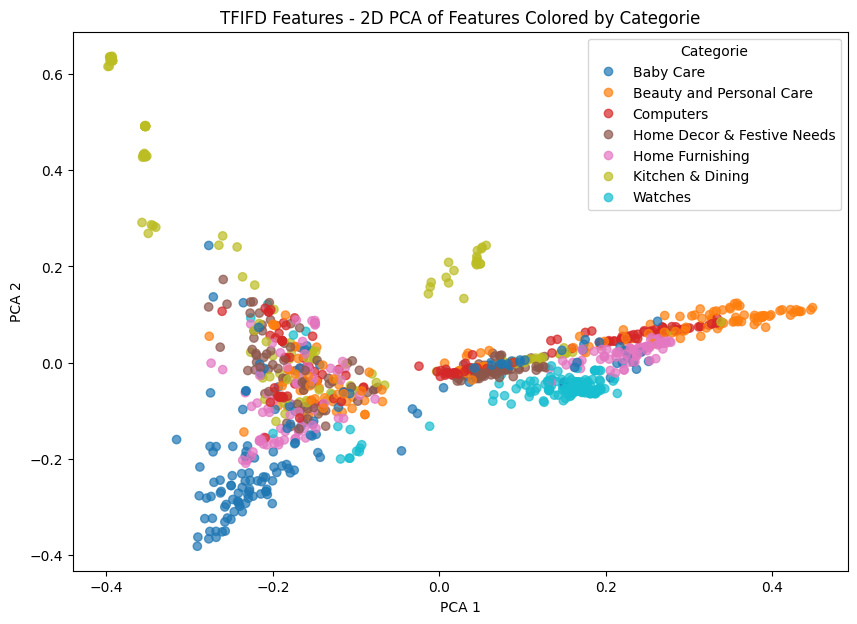

In [45]:
le = LabelEncoder()
labels = le.fit_transform(df['categorie'])

# Fit PCA to reduce to 2 dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_TFIFD_features)

# Plot

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)

# Add legend with category names

handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categorie")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("TFIFD Features - 2D PCA of Features Colored by Categorie")
plt.show()


On peut voir que des groupes apparents émergent (par exemple wacthes en bleu clair, et Baby Care en bleu foncé). Le reste est par contre un peu mélangé.

## Word2Vec (ou Glove / FastText)

In [32]:
# 1) Préparer tes textes (tokenisation)
tokenized_texts = [word_tokenize(doc.lower()) for doc in list_description_str]

# 2) Créer un modèle Word2Vec (si tu n'as pas de modèle pré-entrainé)
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# 3) Fonction pour transformer une phrase en vecteur (moyenne)
def sentence_vector(sentence_tokens, model):
    vectors = []
    for word in sentence_tokens:
        if word in model.wv:  # vérifier que le mot est dans le vocabulaire
            vectors.append(model.wv[word])
    if len(vectors) == 0:
        return np.zeros(model.vector_size)  # phrase vide → vecteur nul
    return np.mean(vectors, axis=0)

# 4) Transformer tout ton corpus en vecteurs
sentence_vectors_word2vec = np.array([sentence_vector(tokens, w2v_model) for tokens in tokenized_texts])

print("Shape du vecteur phrase :", sentence_vectors_word2vec.shape)


Shape du vecteur phrase : (1050, 100)


In [33]:
sentence_vectors_word2vec

array([[-0.18967672,  0.13313745,  0.1484866 , ..., -0.15586291,
         0.19783144, -0.07004717],
       [-0.38929176,  0.2055207 ,  0.18690321, ..., -0.12522042,
         0.49349916, -0.27902445],
       [-0.22635384,  0.12960692,  0.17737724, ..., -0.17320272,
         0.25429493, -0.1395248 ],
       ...,
       [-0.46880674,  0.12875345,  0.06448142, ..., -0.36046955,
         0.15683034, -0.2924789 ],
       [-0.43619326,  0.09506276,  0.07149995, ..., -0.49761215,
         0.14764269, -0.30007797],
       [-0.43685555,  0.08944073,  0.06876896, ..., -0.5164826 ,
         0.13234746, -0.30791023]], dtype=float32)

Une réduction en 2 dimensions, afin de projeter les produits sur un graphique 2D, sous la forme de points dont la couleur correspondra à la catégorie réelle 

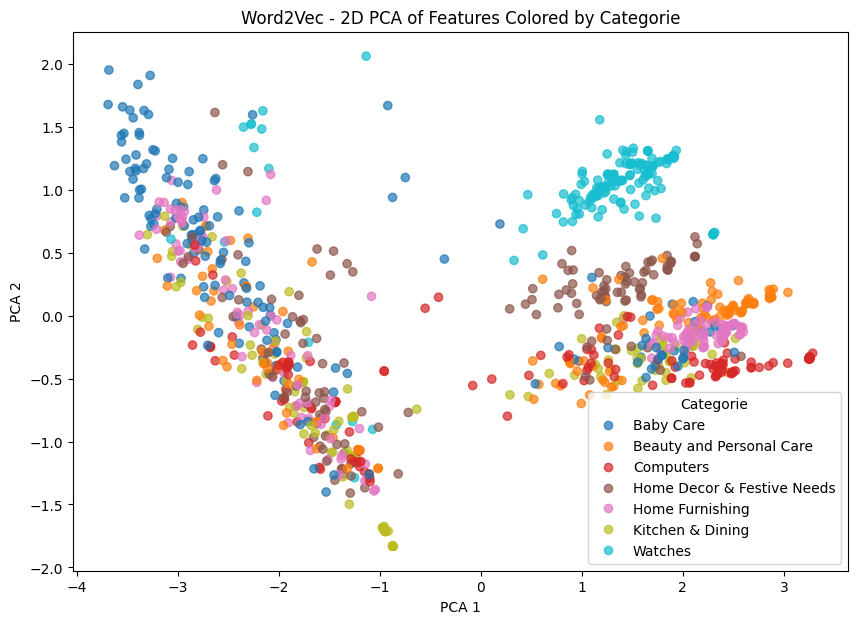

In [ ]:
# Suppose X is your (1050, 100) features array

# df['categorie'] contains your categories

# Encode categories as integers for coloring

le = LabelEncoder()
labels = le.fit_transform(df['categorie'])

# Fit PCA to reduce to 2 dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(sentence_vectors_word2vec)

# Plot

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)

# Add legend with category names

handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categorie")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Word2Vec - 2D PCA of Features Colored by Categorie")
plt.show()


In [35]:
df['categorie']

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: categorie, Length: 1050, dtype: object

faire un seul graphe avec tous les nuages de points avec différentes couleurs, et les catégories correspondantes

# BERT

In [ ]:
# 1️⃣ Load pre-trained BERT model (base uncased)
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 2️⃣ Function to get sentence embedding using [CLS] token
def get_bert_embedding(text):
    # Encode text and convert to tensors
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors="pt", max_length=512)
    # Get model outputs
    with torch.no_grad():
        outputs = model(**encoded_input)
    # Take the [CLS] token embedding as sentence representation
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # shape (1, hidden_size)
    return cls_embedding.squeeze().numpy()  # convert to numpy array

# 3️⃣ Apply to all descriptions
bert_features = [get_bert_embedding(doc) for doc in list_description_str]

# 4️⃣ Convert to numpy array for easy manipulation
import numpy as np
bert_features_array = np.array(bert_features)
print("Shape of BERT features:", bert_features_array.shape)


Shape of BERT features: (1050, 768)


Faire la visualisation 2D avec la PCA et affcicher en couleur les clusters pour chaque catégorie

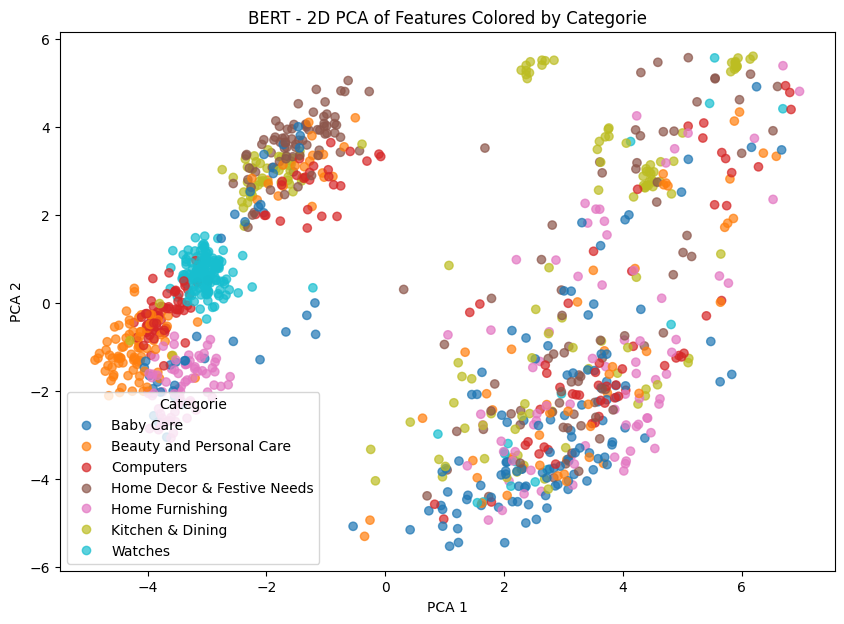

In [37]:
# Suppose X is your (1050, 100) features array

# df['categorie'] contains your categories

# Encode categories as integers for coloring

le = LabelEncoder()
labels = le.fit_transform(df['categorie'])

# Fit PCA to reduce to 2 dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(bert_features)

# Plot

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)

# Add legend with category names

handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categorie")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("BERT - 2D PCA of Features Colored by Categorie")
plt.show()


On voit bien les clusters watches, Beauty and Personal Care qui sont disctincts.   
Les features sont donc assez bonnes, car elles permettent de discriminer les différentes catégories.

# USE (Universal Sentence Encoder).

In [38]:
# 1️⃣ Charger le modèle USE (version English)
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# 2️⃣ Fonction pour obtenir l'embedding d'une phrase ou d'un document
def get_use_embedding(text):
    return use_model([text])[0].numpy()  # retourne un vecteur numpy

# 3️⃣ Appliquer sur tout le corpus
use_features = np.array([get_use_embedding(doc) for doc in list_description_str])

print("Shape des features USE :", use_features.shape)


Shape des features USE : (1050, 512)


Conclusion : C'esr le modèle BERT qui donne un des meilleurs clusterings

Faire le même notebook que l'eex:ple pour la partie images, mais avec les data de mon projet.

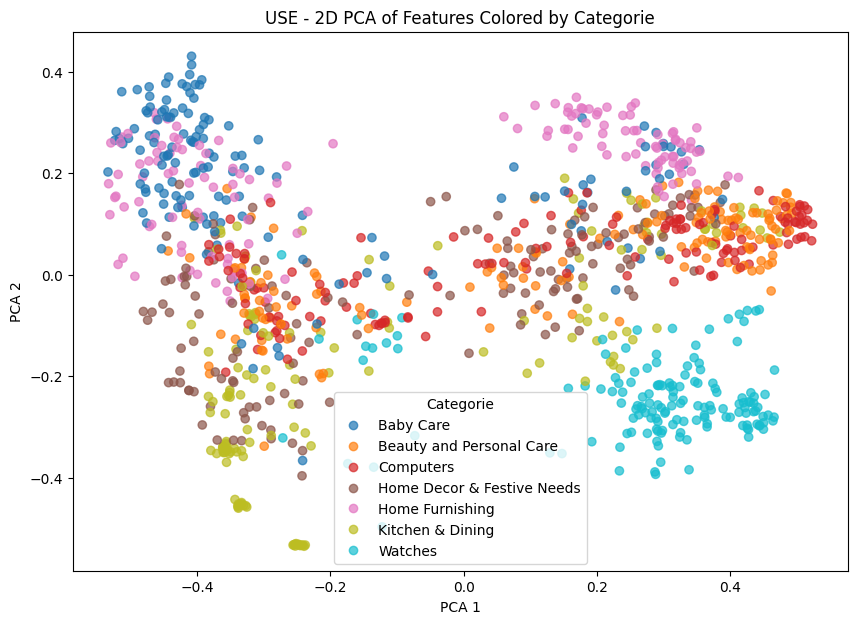

In [39]:
le = LabelEncoder()
labels = le.fit_transform(df['categorie'])

# Fit PCA to reduce to 2 dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(use_features)

# Plot

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)

# Add legend with category names

handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categorie")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("USE - 2D PCA of Features Colored by Categorie")
plt.show()
